# Heart Disease prediction model

## Importing Dependencing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Preprocessing

In [3]:
data=pd.read_csv('Heart.csv')

In [4]:
data.shape

(1025, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [12]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
data.set_axis(['Age','Sex','Chest_pain','Blood_pressure','Cholrestrol','Blood_Sugar','ECG','Heart_rate','Angina','ST_Rest','ST_Peak','Major_vessel_Count','Thalassimia','Target'],axis=1,inplace=True)

In [15]:
data.columns

Index(['Age', 'Sex', 'Chest_pain', 'Blood_pressure', 'Cholrestrol',
       'Blood_Sugar', 'ECG', 'Heart_rate', 'Angina', 'ST_Rest', 'ST_Peak',
       'Major_vessel_Count', 'Thalassimia', 'Target'],
      dtype='object')

## Visualization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

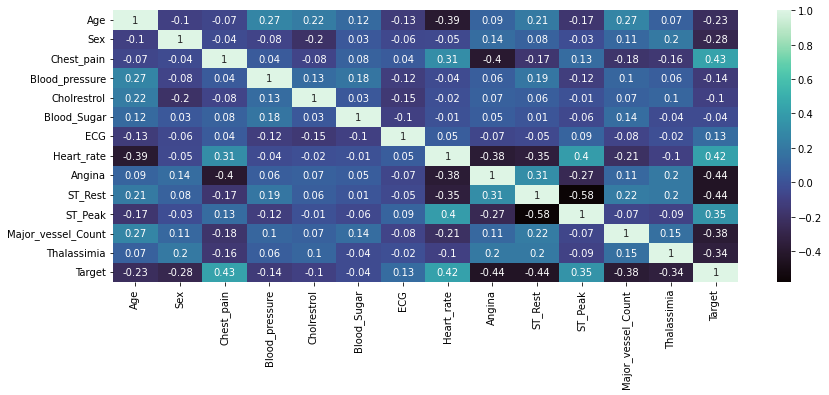

In [17]:
corr= data.corr()
plt.figure(figsize = (14,5))
sns.heatmap(round(corr,2),annot=True,cmap = 'mako')

In [1]:
data=data.hist(bins=30,figsize=(20,20),color='b',alpha=0.6)

NameError: name 'data' is not defined

<AxesSubplot:xlabel='Target', ylabel='count'>

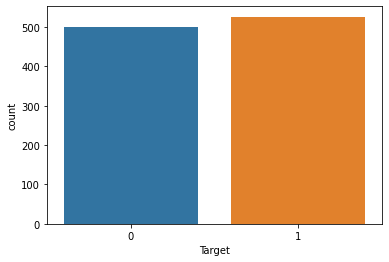

In [19]:
sns.countplot(data=data,x='Target')

## Model Building

In [20]:
X=data[['Age', 'Sex', 'Chest_pain', 'Blood_pressure', 'Cholrestrol',
       'Blood_Sugar', 'ECG', 'Heart_rate', 'Angina', 'ST_Rest', 'ST_Peak',
       'Major_vessel_Count', 'Thalassimia']]
Y=data['Target']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaled_x=scaler.fit_transform(X)

In [23]:
scaled_x

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,Y,test_size=0.2,stratify=Y)

In [26]:
x_train.shape

(820, 13)

In [27]:
x_test.shape

(205, 13)

In [28]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNC',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [29]:
results=[]
names=[] 
for name,model in models: 
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X,Y,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean()*100.0)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LR 84.47648962497621
LDA 82.81934132876452
KNC 75.6044165238911
DTC 99.70873786407766
NB 82.32914525033314
SVM 69.3508471349705


In [30]:
estimators=[]
model1=LogisticRegression()
model2=SVC()
model3=DecisionTreeClassifier()
model4=LinearDiscriminantAnalysis()
model5=GaussianNB()
estimators.append(('LR',model1))
estimators.append(('SVM',model2))
estimators.append(('DTC',model3))
estimators.append(('LDA',model4))
estimators.append(('NB',model5))

In [31]:
ensemble=VotingClassifier(estimators)

In [32]:
kfold=KFold(n_splits=30)
results=cross_val_score(ensemble,scaled_x,Y,cv=kfold)

In [33]:
results

array([0.94285714, 0.85714286, 0.97142857, 0.91428571, 0.94285714,
       0.97058824, 0.91176471, 0.91176471, 0.94117647, 1.        ,
       0.73529412, 0.91176471, 0.85294118, 0.88235294, 0.79411765,
       0.85294118, 0.94117647, 0.97058824, 0.79411765, 0.91176471,
       0.94117647, 0.82352941, 0.88235294, 0.82352941, 0.88235294,
       0.76470588, 0.82352941, 0.82352941, 0.79411765, 0.85294118])

In [34]:
results.mean()*100

88.07563025210084

In [35]:
ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()), ('SVM', SVC()),
                             ('DTC', DecisionTreeClassifier()),
                             ('LDA', LinearDiscriminantAnalysis()),
                             ('NB', GaussianNB())])

In [36]:
print(ensemble.score(x_train,y_train))
print(ensemble.score(x_test,y_test))

0.8878048780487805
0.8878048780487805


In [37]:
x_test

array([[ 0.61379988,  0.66150409, -0.91575542, ..., -0.6241209 ,
         1.20922066,  1.08985168],
       [ 0.39324077,  0.66150409,  1.02761788, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.04787747,  0.66150409,  1.02761788, ..., -0.6241209 ,
        -0.73197147,  1.08985168],
       ...,
       [ 0.50352033,  0.66150409,  1.99930453, ..., -0.6241209 ,
        -0.73197147,  1.08985168],
       [ 0.50352033,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168],
       [-0.93011394,  0.66150409,  0.05593123, ...,  0.99543334,
        -0.73197147,  1.08985168]])

In [38]:
y_pred=ensemble.predict(x_test)

In [39]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [40]:
y_test

182    0
381    0
41     1
28     0
209    0
      ..
123    1
379    1
862    0
382    0
855    1
Name: Target, Length: 205, dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
co=confusion_matrix(y_test,y_pred)

In [43]:
co

array([[86, 14],
       [ 9, 96]], dtype=int64)

In [44]:
import seaborn as sns

<AxesSubplot:>

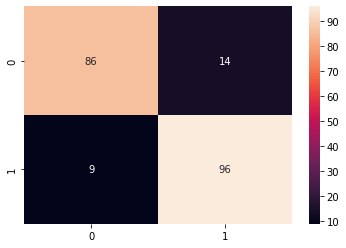

In [45]:
sns.heatmap(co,annot=True,fmt='g')

In [46]:
Recall=99/(99+13)
Precision=99/(99+6)
F_measure=(2*Recall*Precision)/(Recall+Precision)
print("Recall:",Recall*100)
print("Precision:",Precision*100)
print("F_Measure",F_measure*100)

Recall: 88.39285714285714
Precision: 94.28571428571428
F_Measure 91.24423963133641


In [47]:
input_data=(67,0,0,106,223,0,1,142,0,0.3,2,2,2)

In [48]:
input_data_np_array=np.asarray(input_data)

In [49]:
input_data_np_array

array([ 67. ,   0. ,   0. , 106. , 223. ,   0. ,   1. , 142. ,   0. ,
         0.3,   2. ,   2. ,   2. ])

In [50]:
input_data_np_array.shape

(13,)

In [51]:
input_data_reshaped=input_data_np_array.reshape(1,-1)

In [52]:
input_data_reshaped.shape

(1, 13)

In [53]:
pred_value=ensemble.predict(input_data_reshaped)

In [54]:
pred_value

array([0], dtype=int64)

In [55]:
if(pred_value[0]==0):
    print("The person is not having Heart Disease")
else:
    print("The person is having Heart Disease")

The person is not having Heart Disease


## Saving the model

In [82]:
import pickle

In [83]:
pickle.dump(ensemble,open('Heart_disease_model(1).sav','wb'))

## Loading the model

In [84]:
load_model=pickle.load(open('Heart_disease_model(1).sav','rb'))

## Model prediction

In [98]:
input_data=(52,1,3,152,298,1,1,178,0,1.2,1,0,3)
input_data_nue=np.array(input_data,dtype=float)
input_data_np_array=np.asarray(input_data_nue)
input_data_reshaped=input_data_np_array.reshape(1,-1)
pred_value=load_model.predict(input_data_reshaped)
if(pred_value[0]==0):
    print("The person is not having Heart Disease")
else:
    print("The person is having Heart Disease")

The person is not having Heart Disease
